### Importing Libraries and IBMQ Account

In [4]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_17796\104988094.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-04-29 01:27:47,961: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### Defining balanced and constant function Black Boxes

In [10]:
def balanced(n):
    c = QuantumCircuit(n+1,n)
    c.x(n)
    c.barrier()    
    for i in range(n+1):
        c.h(i)
    c.barrier()
    for i in range(n):
        c.cx(i,n)
    c.barrier()
    for i in range(n):
        c.h(i)
    for i in range(n):
        c.measure(i,i)        
    return c

In [11]:
def constant(n):
    c = QuantumCircuit(n+1,n)
    c.x(n)
    c.barrier()    
    for i in range(n+1):
        c.h(i)
    c.barrier()
 
    c.barrier()
    for i in range(n):
        c.h(i)
    for i in range(n):
        c.measure(i,i)        
    return c

#### Creating our Quantum Circuits with Hadamard Sandwich for Balanced and Constant respectively

In [15]:
cb = balanced(3)
cb.draw()

░ ┌───┐ ░                 ░ ┌───┐┌─┐      
q_0: ──────░─┤ H ├─░───■─────────────░─┤ H ├┤M├──────
           ░ ├───┤ ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ──────░─┤ H ├─░───┼────■────────░─┤ H ├─╫─┤M├───
           ░ ├───┤ ░   │    │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ──────░─┤ H ├─░───┼────┼────■───░─┤ H ├─╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 3/════════════════════════════════════════╩══╩══╩═
                                             0  1  2

In [16]:
cc = constant(3)
cc.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐      
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├──────
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐   
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├───
           ░ ├───┤ ░  ░ ├───┤ ║ └╥┘┌─┐
q_2: ──────░─┤ H ├─░──░─┤ H ├─╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├─░─┤ H ├─░──░───────╫──╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║  ║ 
c: 3/═════════════════════════╩══╩══╩═
                              0  1  2

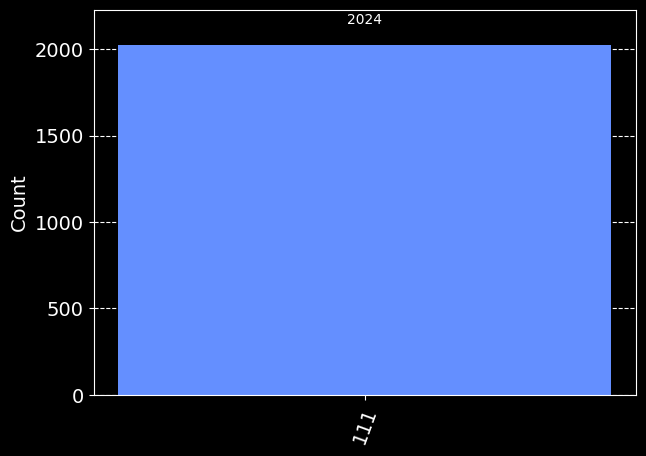

In [17]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(cb, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts)

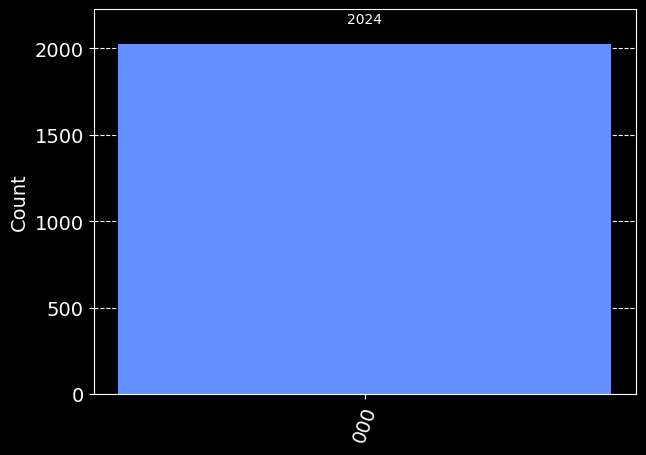

In [18]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(cc, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts)